In [1]:
import numpy as np
import matplotlib.pyplot as plt
from deepRD.plotFunctions import plotTrajectories, plotFPTs
from deepRD.reactionModels import geneticFeedback
from deepRD.reactionIntegrators import gillespie

In [2]:
# Create a genetic feedback stochastic model, given initial conditions for:
G = 1     # Gene
Gstar = 0 # Gene*
M = 50     # mRNA
P = 300     # protein
genFeedbackModel = geneticFeedback(G, Gstar, M, P)

In [3]:
# Set model parameters
# Value useful to define gene switch parameters
volume = 1.0  # ()
averagePconc = 1.0 #100.0/volume # Estimate value of reasonable expected value of P concentration
# Transcription rates of two M molecules per hour from https://www.nature.com/articles/nature10098
# however in some cases it has been observed to go up to 500 molecules per hour
rhou = 2.0 # (1/hour)
rhob = 2.0 # (1/hour)
# mRNA(M) and protein(P) degratation rates. According to https://www.nature.com/articles/nature10098
# half-life of M is 9 hours and of P is 46 hours
dm = 1.0/(46.0) # (1/hour)
dp = 1.0/(9.0)  # (1/hour)
# Translation rate of 140 proteins per hour for each mRNA molecule (median value 
# from https://www.nature.com/articles/nature10098) Can reach 1300 or so and also lower values, 10 or so
k = 14 #140.0  # (1/hour)
# On and off gene switching from https://www.nature.com/articles/s41586-018-0836-1 
# (not 100% sure they are correct), but seem in the right ballpark, see Fig 1a. I think 
# they are in units of 1/hour, but need to double check. 
sigmau = 2.71 # (1/hour)
sigmab = 12.0/averagePconc # (volume/hour)
genFeedbackModel.setModelParameters(rhou, rhob, sigmau, sigmab, dm, dp, k, volume)

In [4]:
# Create integrator
integratorGillespie = gillespie(stride=1, tfinal=1000)

In [5]:
t, X = integratorGillespie.propagate(genFeedbackModel)

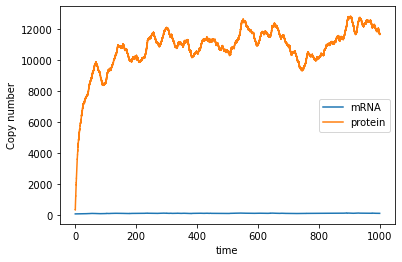

In [6]:
plotTrajectories(t, X , names = genFeedbackModel.names, indexes = [2,3]);

In [ ]:
#genFeedbackModel.dt = 0.0000001
#integrateTauLeap(genFeedbackModel, tfinal = 1)

In [ ]:
numSamples = 25
FPTs = genFeedbackModel.oneCycleFPTs(numSamples, G, Gstar, M, P)

In [ ]:
plotFPTs(FPTs, bins=50 , name="FPT distribution for one mRNA cyle");